# ETF Analysis

ETF Project 1


#### Initialize python packages


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Read data from csv file


In [2]:
file_path = 'finans1_data.csv'

# Read data into a pandas DataFrame
D = pd.read_csv(file_path, delimiter=";")
# Keep only the dates and the selected ETFs (AGG, VAW, IWN, and SPY).
D = D.loc[:, ["t", "AGG", "VAW", "IWN", "SPY"]]

#### a) Simple summary of dataset


In [3]:
print(f"Dimension of DataFrame: {D.shape}")
print(f"Variable names: {D.columns}")
print("\nFirst few rows of DataFrame:")
display(D.head())
print("Last row of DataFrame:")
display(D.tail())
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)

Dimension of DataFrame: (454, 5)
Variable names: Index(['t', 'AGG', 'VAW', 'IWN', 'SPY'], dtype='object')

First few rows of DataFrame:


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815


Last row of DataFrame:


,t,AGG,VAW,IWN,SPY
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394
453,2015-5-8,-0.000453,0.004074,0.002566,0.004271


Some summary statistics:


,AGG,VAW,IWN,SPY
count,454.000000,454.000000,454.000000,454.000000
mean,0.000266,0.001794,0.001188,0.001360
std,0.005976,0.036083,0.032015,0.024786
min,-0.029604,-0.203660,-0.179655,-0.137598
25%,-0.002973,-0.016096,-0.014305,-0.011325
50%,0.000237,0.004798,0.003120,0.004216
75%,0.003893,0.019685,0.019056,0.014498
max,0.030507,0.142977,0.126702,0.083276


Data types: t       object
AGG    float64
VAW    float64
IWN    float64
SPY    float64
dtype: object


#### b) Density histogram


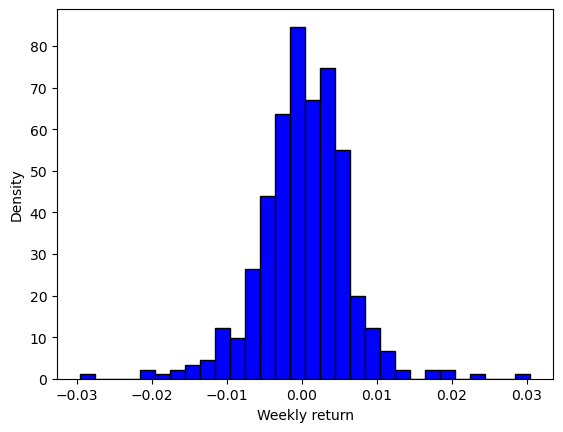

In [4]:
# Histogram describing the empirical density of the weekly returns from
# AGG (histogram of weekly returns normalized to have an area of 1)
plt.hist(D['AGG'].dropna(), bins=30, density=True, color='blue',
         edgecolor='black')  # dropna() removes potential missing values
plt.xlabel("Weekly return")
plt.ylabel("Density")
plt.show()

#### Date variable t


In [5]:
# Converts the variable 't' to a date variable
D['t'] = pd.to_datetime(D['t'])
# to_datetime() method converts string to a datetime pandas object.
# This is necesary to make it ordinal
display(D['t'].describe())

count                              454
mean     2010-11-05 08:37:00.264317184
min                2006-05-05 00:00:00
25%                2008-08-05 18:00:00
50%                2010-11-04 12:00:00
75%                2013-02-06 06:00:00
max                2015-05-08 00:00:00
Name: t, dtype: object

#### c) Weekly return over time


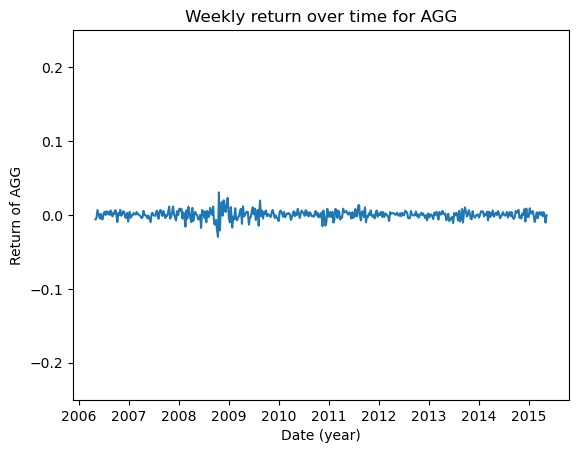

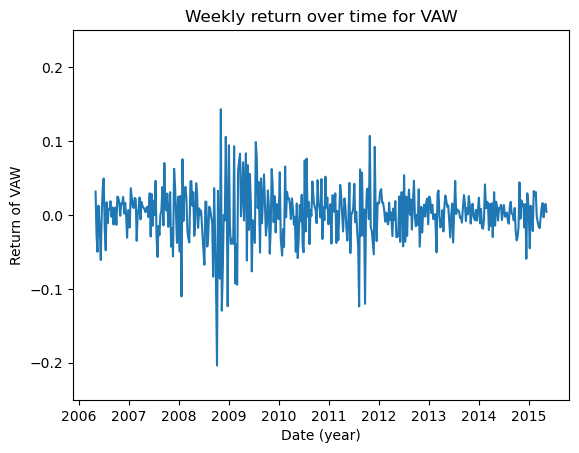

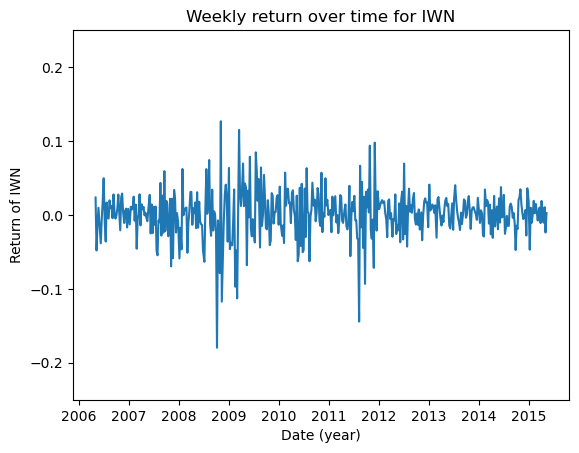

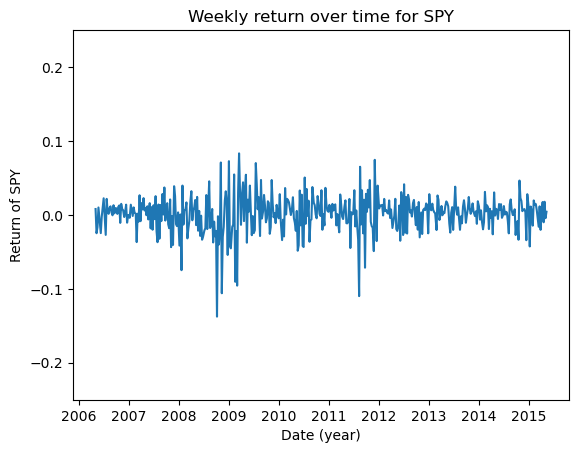

In [6]:
# Plot of weekly return over time for selected ETFs
ylim = (-0.25, 0.25)
for etf in ['AGG', 'VAW', 'IWN', 'SPY']:
    plt.plot(D['t'], D[etf], label=etf)
    plt.ylim(ylim)
    plt.title(f"Weekly return over time for {etf}")
    plt.xlabel("Date (year)")
    plt.ylabel(f"Return of {etf}")
    plt.show()

#### d) Box plot


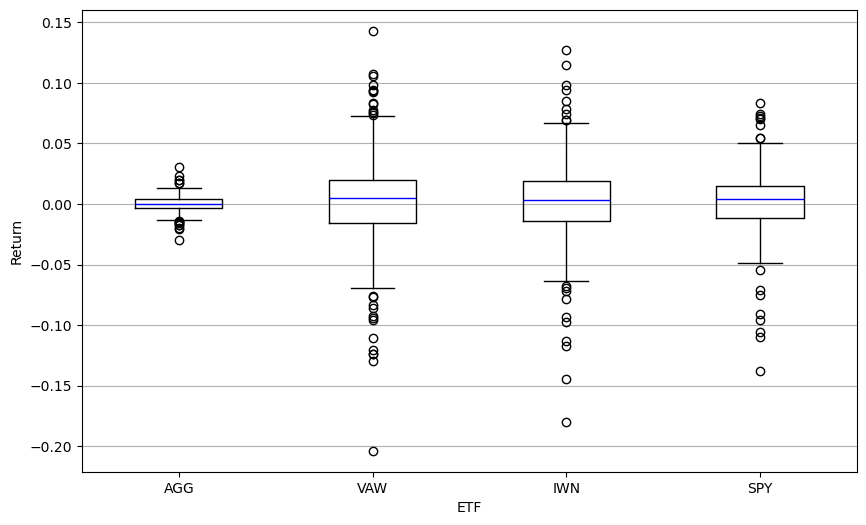

In [7]:
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

plt.figure(figsize=(10, 6))
plt.boxplot([D['AGG'], D['VAW'], D['IWN'], D['SPY']],
            tick_labels=etfs, medianprops=dict(color='blue'))
plt.xlabel("ETF")
plt.ylabel("Return")
plt.grid(axis='y')
plt.show()

#### e) Summary statistics


In [8]:
for etf in ['AGG', 'VAW', 'IWN', 'SPY']:
    print(f"Summary statistics for {etf}: \n")
    print(
        f"Total number of observations (without missing values): {D[etf].notna().sum()}")
    print(f"Sample mean of weekly returns: {np.mean(D[etf])}")
    # ddof=1 as we want the *sample* variance
    print(f"Sample variance of weekly returns: {np.var(D[etf], ddof=1)}")
    print(f"Sample std of weekly returns: {np.std(D[etf], ddof=1)}")
    print(f"Lower quantile: {np.quantile(D[etf], q=0.25)}")
    print(f"Median: {np.median(D[etf])}")
    print(f"Upper quantile: {np.quantile(D[etf], q=0.75)} \n \n")

Summary statistics for AGG: 

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.00026575697622256976
Sample variance of weekly returns: 3.5710678035142804e-05
Sample std of weekly returns: 0.005975841198956245
Lower quantile: -0.002973253602999425
Median: 0.0002374460861532
Upper quantile: 0.003893193348675225 
 

Summary statistics for VAW: 

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.001793790119444702
Sample variance of weekly returns: 0.001301973052671574
Sample std of weekly returns: 0.036082863698320485
Lower quantile: -0.01609575159466925
Median: 0.004797924867817599
Upper quantile: 0.019685223586172453 
 

Summary statistics for IWN: 

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.0011876792478567023
Sample variance of weekly returns: 0.0010249901098059928
Sample std of weekly returns: 0.03201546672791126
Lower quantile: -0.014305187900575325


#### f) QQ-plot for model validation


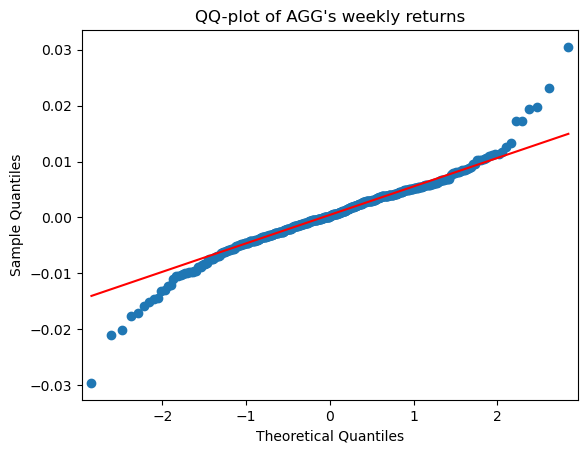

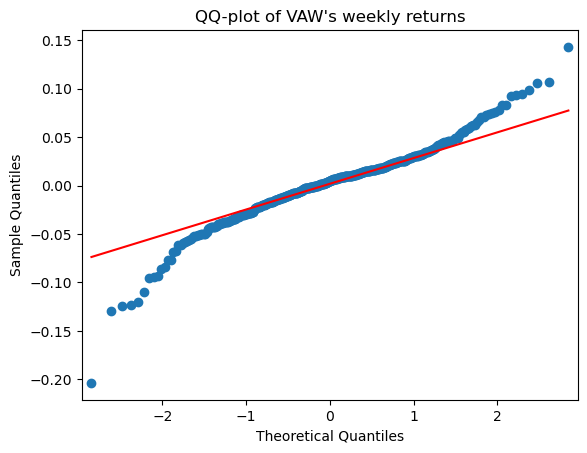

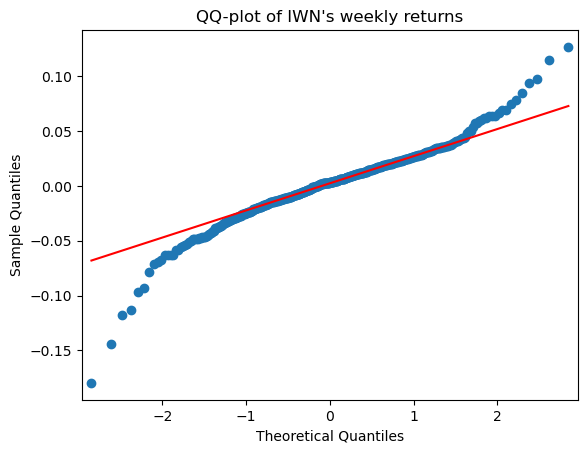

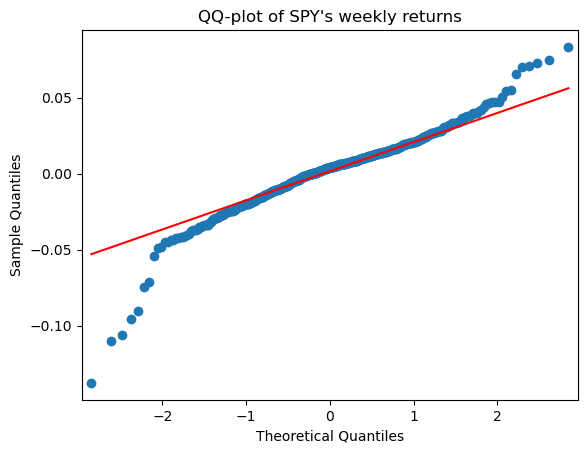

In [9]:
# QQ-plot of the ETFs weekly returns
for etf in ['AGG', 'VAW', 'IWN', 'SPY']:
    sm.qqplot(D[etf].dropna(), line='q')
    plt.title(f"QQ-plot of {etf}'s weekly returns")
    plt.show()

#### g-h) One-sample t-test


In [10]:
# Manual computation of 95% confidence interval for AGG:
lower = 0.00026575697622256976 - \
    stats.t.ppf(0.975, df=453) * 0.005975841198956245 / np.sqrt(454)
upper = 0.00026575697622256976 + \
    stats.t.ppf(0.975, df=453) * 0.005975841198956245 / np.sqrt(454)
print(f"Lower: {lower}, Upper: {upper}")

# Manual computation of 95% confidence interval for VAW:
lower = 0.001793790119444702 - \
    stats.t.ppf(0.975, df=453) * 0.036082863698320485 / np.sqrt(454)
upper = 0.001793790119444702 + \
    stats.t.ppf(0.975, df=453) * 0.036082863698320485 / np.sqrt(454)
print(f"Lower: {lower}, Upper: {upper}")

# Manual computation of 95% confidence interval for IWN:
lower = 0.0011876792478567023 - \
    stats.t.ppf(0.975, df=453) * 0.03201546672791126 / np.sqrt(454)
upper = 0.0011876792478567023 + \
    stats.t.ppf(0.975, df=453) * 0.03201546672791126 / np.sqrt(454)
print(f"Lower: {lower}, Upper: {upper}")

# Manual computation of 95% confidence interval for SPY:
lower = 0.0013601054498460002 - \
    stats.t.ppf(0.975, df=453) * 0.02478601001698587 / np.sqrt(454)
upper = 0.0013601054498460002 + \
    stats.t.ppf(0.975, df=453) * 0.02478601001698587 / np.sqrt(454)
print(f"Lower: {lower}, Upper: {upper}")


# Test hypothesis mu = 0 for AGG's weekly returns
res = stats.ttest_1samp(D['AGG'], popmean=0)
print(f" \n Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

# Confidence interval
print(res.confidence_interval())

Lower: -0.0002854073451844401, Upper: 0.0008169212976295796
Lower: -0.0015342078012798408, Upper: 0.005121788040169245
Lower: -0.0017651741507074977, Upper: 0.004140532646420902
Lower: -0.0009259600489804174, Upper: 0.0036461709486724178
 
 Test statistic: 0.9475749082082546
P-value: 0.3438511026649561
ConfidenceInterval(low=np.float64(-0.00028540734518444), high=np.float64(0.0008169212976295796))


#### i) Welch t-test


In [11]:
# Comaring the mean weekly returns of VAW and AGG
res = stats.ttest_ind(D['VAW'].dropna(), D['AGG'].dropna(), equal_var=False)
print(f"Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

Test statistic: 0.8901925966613312
P-value: 0.3738104498113183


#### k) Correlation


0.8535207368783462


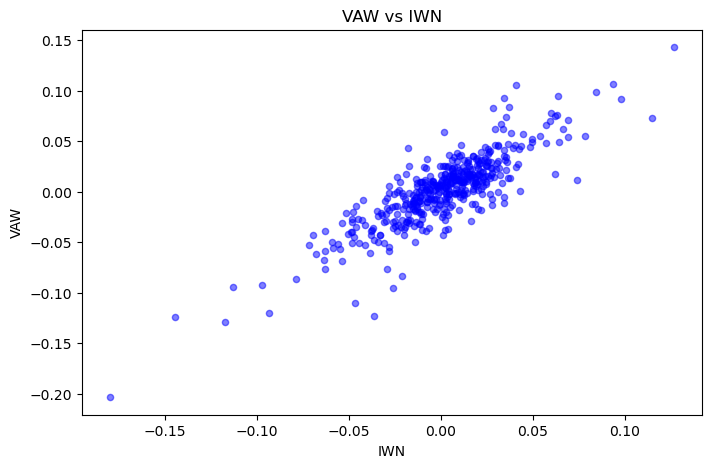

In [19]:
# Compute correlation
correlation = np.cov(D['VAW'], D['IWN'], ddof=1)[0, 1] / \
    (np.std(D['VAW']) * np.std(D['IWN']))
print(correlation)


# Scatter plot
plt.figure(figsize=(8, 5))

plt.scatter(D['IWN'], D['VAW'], color='blue', alpha=0.5, s=20)

plt.xlabel("IWN")
plt.ylabel("VAW")
plt.title("VAW vs IWN")
plt.show()